Misbah Sabir (42101-5802137-4)

**BitCoin Prediction**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense



In [ ]:
df=pd.read_csv('BitCoin.csv',parse_dates=['Date'])
df.head()

,Unnamed: 0,Open,Max,Min,Close,Volume,Margin,Date
0,0,357.00,364.98,356.00,362.06,627500.0,720.020,2015-01-01
1,1,363.00,369.88,363.00,367.85,1232500.0,731.865,2015-01-02
2,2,365.70,365.90,360.00,363.37,1228400.0,727.485,2015-01-05
3,3,361.00,362.48,356.10,356.84,1509000.0,718.210,2015-01-06
4,4,356.45,359.90,351.29,352.39,1524900.0,710.015,2015-01-07


In [ ]:
df.shape

(2215, 8)

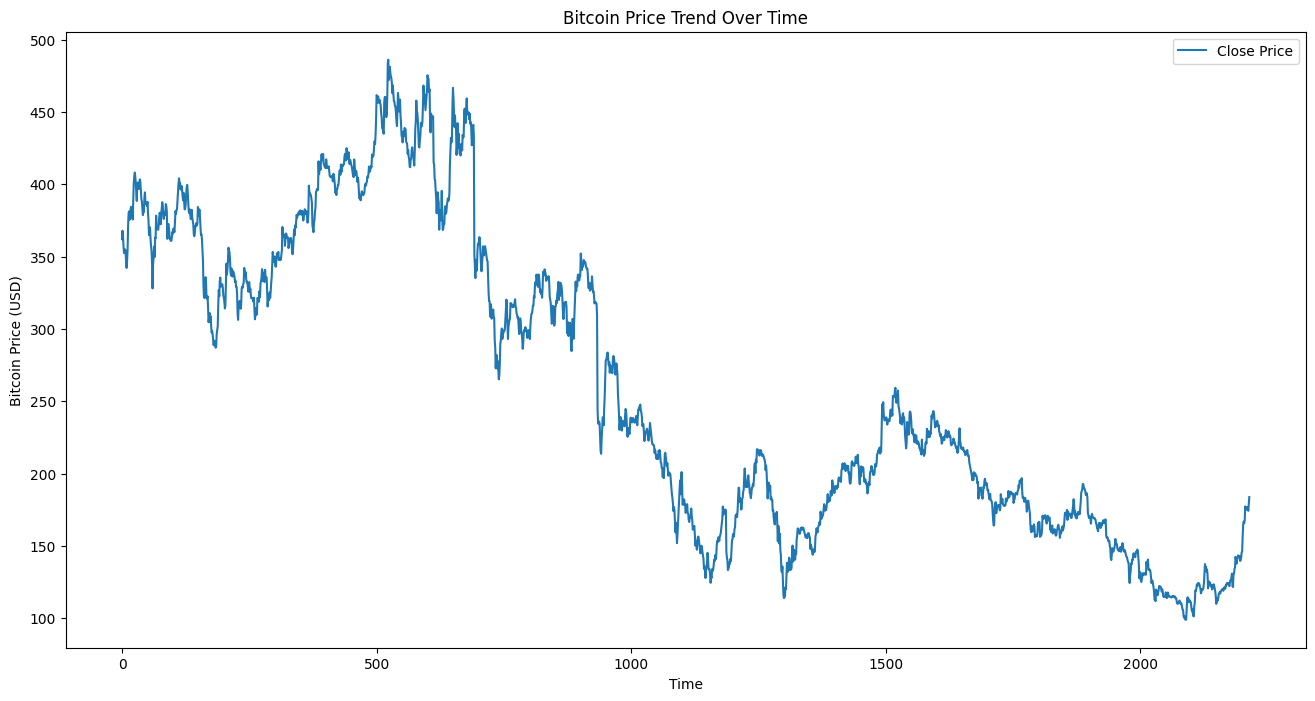

In [ ]:
# Plot trend with all features
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Price Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()

**Data Preprocessing**

In [ ]:
margin_values = df['Margin'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_margin = scaler.fit_transform(margin_values)

In [ ]:
sequence_length = 50
sequences = []
next_values = []
for i in range(len(scaled_margin) - sequence_length):
    sequences.append(scaled_margin[i:i+sequence_length])
    next_values.append(scaled_margin[i+sequence_length])

sequences = np.array(sequences)
next_values = np.array(next_values)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences, next_values, test_size=0.2, random_state=42)


Build the Model RNN

In [ ]:
import tensorflow as tf
# Initialising the RNN
model = tf.keras.Sequential()

# Adding the input layer and the LSTM layer
model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences=True))

# Adding the GRU layer
model.add(GRU(50, return_sequences=False))

# Adding the Output layer
model.add(Dense(1))

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 gru (GRU)                   (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 25751 (100.59 KB)
Trainable params: 25751 (100.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
55/55 [==============================] - 9s 13ms/step - loss: 0.0227
Epoch 2/30
55/55 [==============================] - 1s 14ms/step - loss: 9.0885e-04
Epoch 3/30
55/55 [==============================] - 1s 21ms/step - loss: 8.5973e-04
Epoch 4/30
55/55 [==============================] - 1s 13ms/step - loss: 8.1601e-04
Epoch 5/30
55/55 [==============================] - 1s 16ms/step - loss: 7.6401e-04
Epoch 6/30
55/55 [==============================] - 1s 13ms/step - loss: 7.1339e-04
Epoch 7/30
55/55 [==============================] - 1s 15ms/step - loss: 6.9061e-04
Epoch 8/30
55/55 [==============================] - 1s 13ms/step - loss: 6.2307e-04
Epoch 9/30
55/55 [==============================] - 1s 12ms/step - loss: 6.0772e-04
Epoch 10/30
55/55 [==============================] - 1s 14ms/step - loss: 5.9495e-04
Epoch 11/30
55/55 [==============================] - 1s 13ms/step - loss: 5.6886e-04
Epoch 12/30
55/55 [==============================] - 1s 17ms/step - loss: 5.24

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Model Loss on Test Data: {loss}')


14/14 [==============================] - 1s 5ms/step - loss: 2.3756e-04
Model Loss on Test Data: 0.00023755636357236654


In [ ]:
predictions = model.predict(X_test)

14/14 [==============================] - 1s 4ms/step


In [ ]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

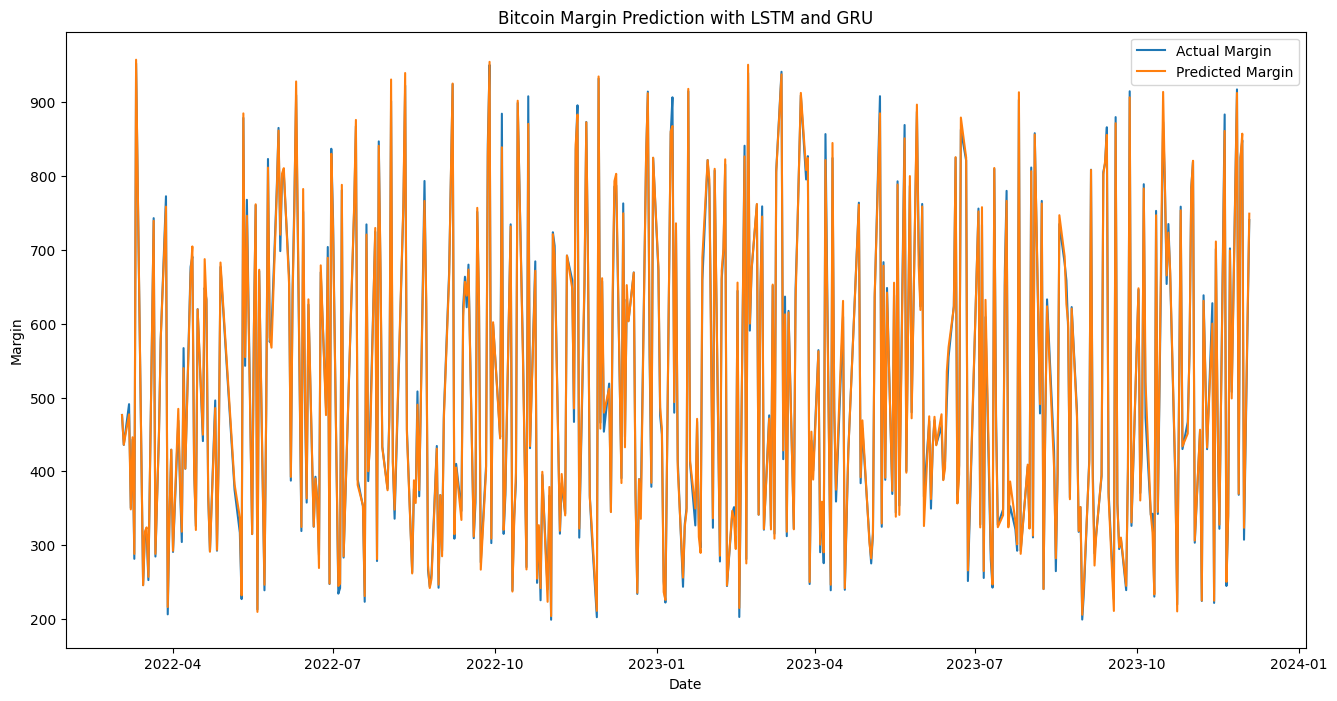

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df['Date'].values[-len(y_test):], y_test, label='Actual Margin')
plt.plot(df['Date'].values[-len(predictions):], predictions, label='Predicted Margin')
plt.xlabel('Date')
plt.ylabel('Margin')
plt.title('Bitcoin Margin Prediction with LSTM and GRU')
plt.legend()
plt.show()